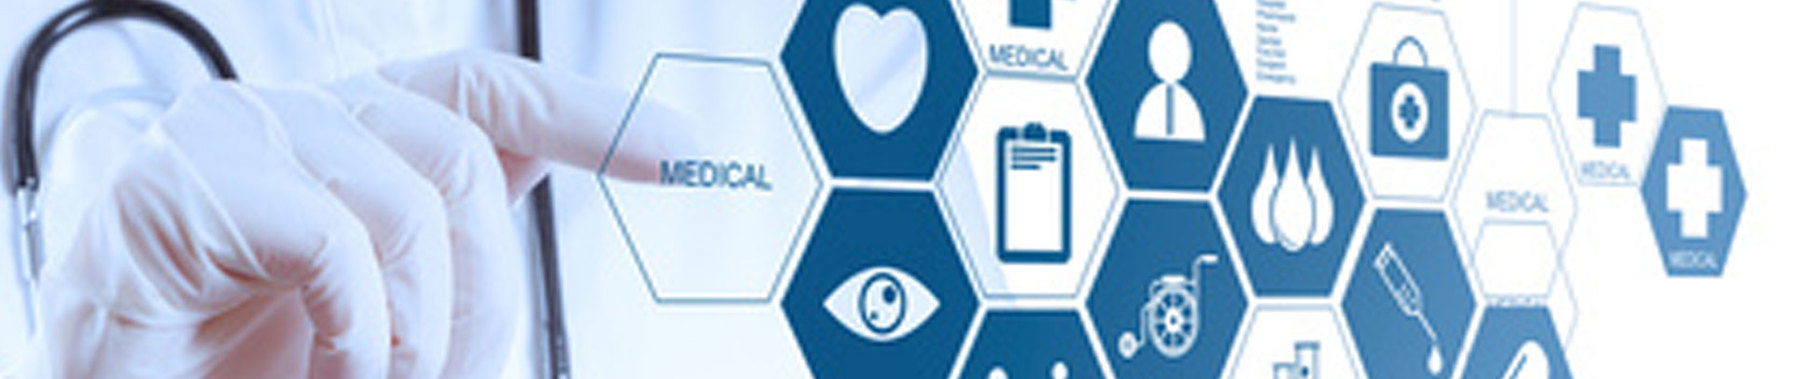

# Ruben Casa           => 7    
## Dataset Asignado: **Insurance.csv**

Este dataset contiene información de **1,337 clientes** de una compañía de seguros médicos en Estados Unidos.  
Incluye:

- **Datos demográficos:** edad, sexo, región  
- **Indicadores de salud:** BMI, fumador  
- **Información familiar:** número de hijos  
- **Variable objetivo de análisis:** cargos del seguro (*charges*)


## Método Asignado: **M2 - Método No Supervisado**

El aprendizaje **no supervisado** busca descubrir patrones y estructuras ocultas en los datos **sin usar etiquetas**.  
Se emplea para:

- Identificar grupos naturales dentro del dataset  
- Detectar comportamientos similares  
- Encontrar anomalías o valores atípicos  

## Modelo Asignado: **U3 - DBSCAN**

**DBSCAN**  es un algoritmo de clustering basado en densidad que:

- Agrupa puntos que están **cerca** unos de otros  
- Marca como **ruido/outliers** a los puntos aislados  
- No requiere definir el número de clusters  
- Puede detectar **clusters de forma arbitraria**, a diferencia de K-Means  


## Objetivo del Proyecto

Aplicar **DBSCAN** al dataset de seguros para:

- **Segmentar clientes** en grupos homogéneos  
- Identificar **patrones de comportamiento**  
- Detectar **casos atípicos** que puedan representar clientes de **alto riesgo** para la aseguradora  

# 1. Carga y descripción del dataset

In [1]:
import pandas as pd
import numpy as np

# 1. Cargar el dataset
df = pd.read_csv('insurance.csv')

# 2. Mostrar las primeras filas
print("PRIMERAS FILAS DEL DATASET")
df.head(10)

PRIMERAS FILAS DEL DATASET


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#  Estructura general
print("\nESTRUCTURA GENERAL")
print(f"Dimensiones (filas, columnas): {df.shape}")
print(f"Total de registros: {df.shape[0]}")
print(f"Total de variables: {df.shape[1]}")
print("\nTipos de datos:")
print(df.dtypes)

#  Valores faltantes
print("\nVALORES FALTANTES")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_pct})
print(missing_df)
print(f"\nTotal de valores faltantes: {df.isnull().sum().sum()}")

#  Tipos de variables
print("\nTIPOS DE VARIABLES")
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables numéricas ({len(numericas)}): {numericas}")
print(f"Variables categóricas ({len(categoricas)}): {categoricas}")

# Estadísticas descriptivas
print("\nESTADÍSTICAS DESCRIPTIVAS")
display(df.describe())

#  Calidad de datos
print("\nANÁLISIS DE CALIDAD DE DATOS")
print(f"Filas duplicadas: {df.duplicated().sum()}")
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} valores únicos")

# Eliminar duplicados si existen
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"\nDuplicados eliminados. Nuevo shape: {df.shape}")


ESTRUCTURA GENERAL
Dimensiones (filas, columnas): (1337, 7)
Total de registros: 1337
Total de variables: 7

Tipos de datos:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

VALORES FALTANTES
          Valores Faltantes  Porcentaje (%)
age                       0             0.0
sex                       0             0.0
bmi                       0             0.0
children                  0             0.0
smoker                    0             0.0
region                    0             0.0
charges                   0             0.0

Total de valores faltantes: 0

TIPOS DE VARIABLES
Variables numéricas (4): ['age', 'bmi', 'children', 'charges']
Variables categóricas (3): ['sex', 'smoker', 'region']

ESTADÍSTICAS DESCRIPTIVAS


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010



ANÁLISIS DE CALIDAD DE DATOS
Filas duplicadas: 0

Valores únicos por columna:
  age: 47 valores únicos
  sex: 2 valores únicos
  bmi: 548 valores únicos
  children: 6 valores únicos
  smoker: 2 valores únicos
  region: 4 valores únicos
  charges: 1337 valores únicos


Dataset de seguros medicos tiene 1,337 registros y 7 variables (4 numéricas, 3 categóricas). Sin valores faltantes ni duplicados. Datos limpios y listos para aplicar K-Means. Variable objetivo: segmentar clientes por características.

# 2. Preprocesamiento y limpieza

2. PREPROCESAMIENTO Y LIMPIEZA

2.1 TRATAMIENTO DE VALORES FALTANTES
Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
cluster     0
dtype: int64

Total de valores faltantes: 0

→ DECISIÓN: No se requiere imputación ni eliminación.
   El dataset está completo, sin valores faltantes.

2.2 DETECCIÓN DE VALORES ATÍPICOS


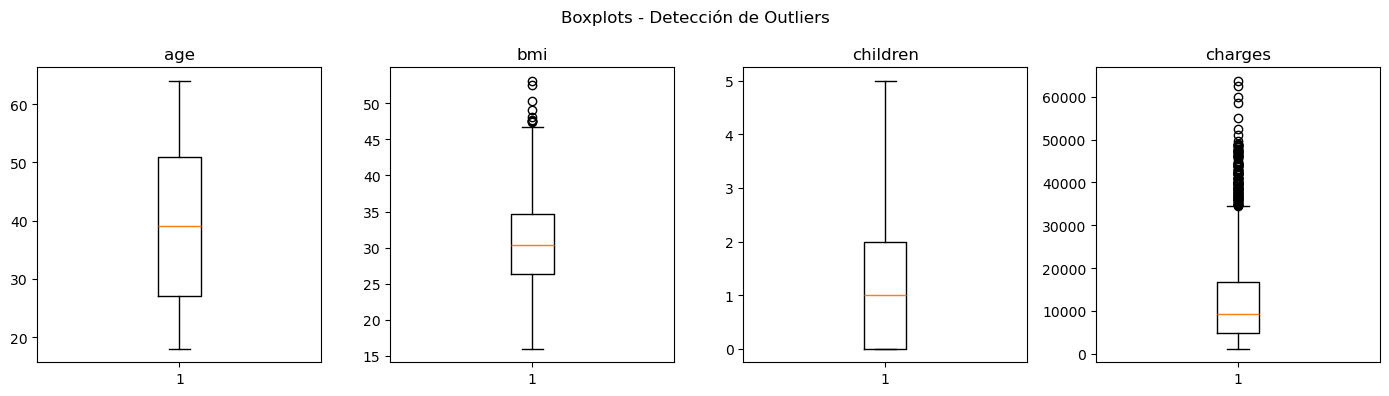


Outliers detectados (método IQR):
  age: 0 outliers
  bmi: 9 outliers
  children: 0 outliers
  charges: 139 outliers

2.3 CODIFICACIÓN DE VARIABLES CATEGÓRICAS
----------------------------------------


,age,sex,bmi,children,smoker,region,charges,cluster
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1


In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 2. PREPROCESAMIENTO Y LIMPIEZA
print("2. PREPROCESAMIENTO Y LIMPIEZA")

# 2.1 TRATAMIENTO DE VALORES FALTANTES
print("\n2.1 TRATAMIENTO DE VALORES FALTANTES")
print(f"Valores faltantes por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores faltantes: {df.isnull().sum().sum()}")
print("\n→ DECISIÓN: No se requiere imputación ni eliminación.")
print("   El dataset está completo, sin valores faltantes.")

# 2.2 DETECCIÓN Y TRATAMIENTO DE VALORES ATÍPICOS
print("\n2.2 DETECCIÓN DE VALORES ATÍPICOS")

fig, axes = plt.subplots(1, 4, figsize=(14, 4))
numericas = ['age', 'bmi', 'children', 'charges']

for i, col in enumerate(numericas):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.suptitle('Boxplots - Detección de Outliers')
plt.tight_layout()
plt.show()

# Calcular outliers con IQR
print("\nOutliers detectados (método IQR):")
for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col].count()
    print(f"  {col}: {outliers} outliers")

# 2.3 CODIFICACIÓN DE VARIABLES CATEGÓRICAS
print("\n2.3 CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("-" * 40)

df_encoded = df.copy()
le = LabelEncoder()

df_encoded['sex'] = le.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])
df_encoded['region'] = le.fit_transform(df_encoded['region'])
display(df_encoded.head())


**Resultado:**  
- **0 valores faltantes**  
- El dataset está completo, **no requiere imputación**.

### 2.2 Valores Atípicos (Outliers)

| Variable  | Outliers | Decisión     |
|-----------|----------|--------------|
| age       | 0        | -            |
| bmi       | 9        | Conservar    |
| children  | 0        | -            |
| charges   | 139      | Conservar    |

**Justificación:**  
- Los outliers reflejan **casos reales del negocio**, no errores:
  - **BMI muy alto** → clientes con obesidad.
  - **Charges elevados** → fumadores o clientes con condiciones médicas costosas.
- Eliminarlos afectaría la estructura natural que DBSCAN debe descubrir.


### 2.3 Codificación de Variables Categóricas

Se aplicó **Label Encoding**:

| Variable | Codificación |
|----------|--------------|
| **sex** | female = 0, male = 1 |
| **smoker** | no = 0, yes = 1 |
| **region** | northeast = 0, northwest = 1, southeast = 2, southwest = 3 |

Todas las variables quedan listas para ser procesadas por **DBSCAN**.


# 3. Análisis exploratorio básico

3.1 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS


C:\Users\RubenC\AppData\Local\Temp\ipykernel_2500\2573923916.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
C:\Users\RubenC\AppData\Local\Temp\ipykernel_2500\2573923916.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='Set2')
C:\Users\RubenC\AppData\Local\Temp\ipykernel_2500\2573923916.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set2')
C:\Users\RubenC\AppData\Local\Temp\ipykernel_2500\25739239

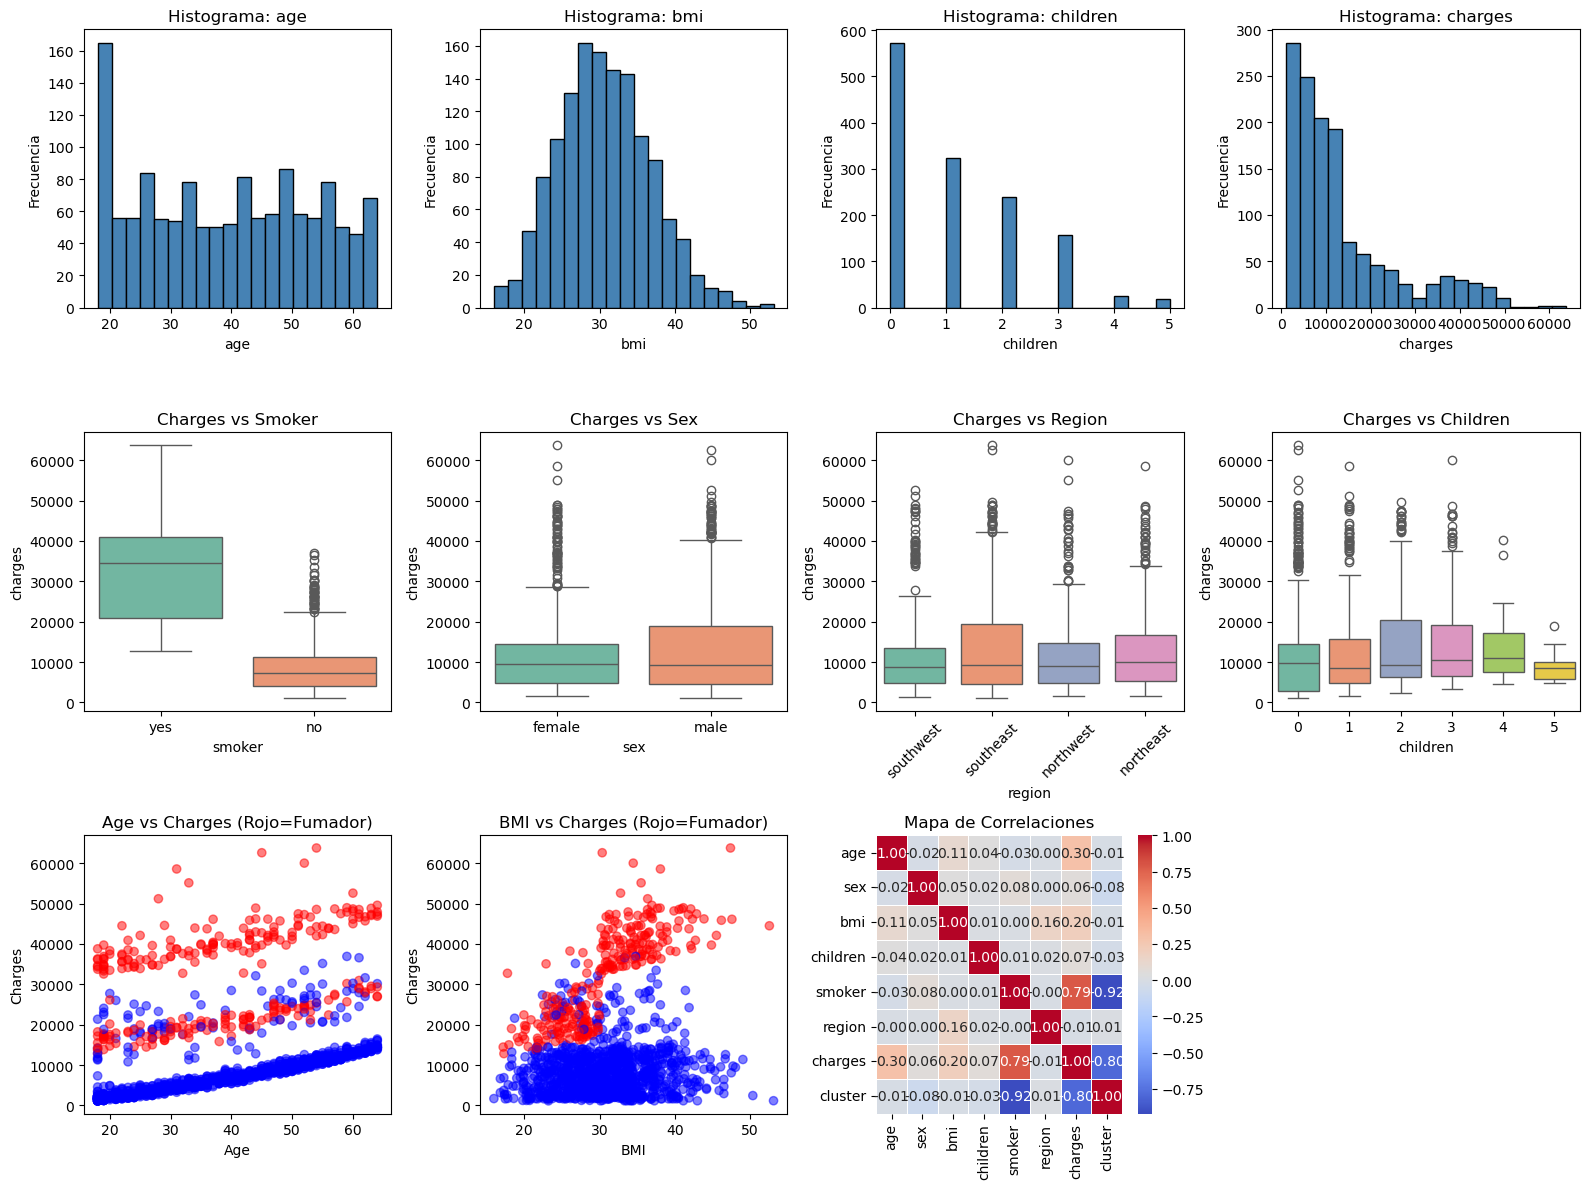

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. ANÁLISIS EXPLORATORIO BÁSICO

fig = plt.figure(figsize=(16, 12))

# 3.1 HISTOGRAMAS - Distribución de variables numéricas
print("3.1 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS")
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(3, 4, i+1)
    plt.hist(df[col], bins=20, color='steelblue', edgecolor='black')
    plt.title(f'Histograma: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# 3.2 BOXPLOTS - Charges por categorías
plt.subplot(3, 4, 5)
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Charges vs Smoker')

plt.subplot(3, 4, 6)
sns.boxplot(x='sex', y='charges', data=df, palette='Set2')
plt.title('Charges vs Sex')

plt.subplot(3, 4, 7)
sns.boxplot(x='region', y='charges', data=df, palette='Set2')
plt.title('Charges vs Region')
plt.xticks(rotation=45)

plt.subplot(3, 4, 8)
sns.boxplot(x='children', y='charges', data=df, palette='Set2')
plt.title('Charges vs Children')

# 3.3 SCATTER PLOTS
plt.subplot(3, 4, 9)
plt.scatter(df['age'], df['charges'], c=df['smoker'].map({'yes': 'red', 'no': 'blue'}), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges (Rojo=Fumador)')

plt.subplot(3, 4, 10)
plt.scatter(df['bmi'], df['charges'], c=df['smoker'].map({'yes': 'red', 'no': 'blue'}), alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Rojo=Fumador)')

# 3.4 MAPA DE CALOR - Correlaciones
plt.subplot(3, 4, 11)
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones')

plt.tight_layout()
plt.show()

## Histogramas
- **Age:** Distribución uniforme, edades entre 18-64 años.  
- **BMI:** Distribución normal, promedio ~30 (sobrepeso).  
- **Children:** Mayoría tiene 0-1 hijos.  
- **Charges:** Sesgada a la derecha, mayoría paga menos de \$15,000.  

## Boxplots
- **Smoker:** Fumadores pagan 3-4 veces más que no fumadores (hallazgo más importante).  
- **Sex:** Sin diferencia significativa entre géneros.  
- **Region:** Distribución similar en las 4 regiones.  
- **Children:** Sin patrón claro.  

## Scatter Plots
- **Age vs Charges:** Relación positiva; a mayor edad, mayores cargos. Fumadores (rojo) siempre arriba.  
- **BMI vs Charges:** Fumadores con alto BMI tienen cargos extremos (\$40,000-\$60,000).  

## Correlaciones
- **Smoker–Charges:** 0.79 → Variable más influyente.  
- **Age–Charges:** 0.30 → Correlación moderada.  
- **BMI–Charges:** 0.20 → Correlación baja.  

####  Conclusión : Ser fumador es el factor principal que determina los cargos del seguro.


# 4. Estandarización / normalización

4. ESTANDARIZACIÓN DE VARIABLES PARA DBSCAN

4.1 ESCALAS ORIGINALES DE LAS VARIABLES
            age       sex        bmi  children    smoker    region  \
min   18.000000  0.000000  15.960000  0.000000  0.000000  0.000000   
max   64.000000  1.000000  53.130000  5.000000  1.000000  3.000000   
mean  39.222139  0.504862  30.663452  1.095737  0.204936  1.516081   
std   14.044333  0.500163   6.100468  1.205571  0.403806  1.105208   

           charges   cluster  
min    1121.873900 -1.000000  
max   63770.428010  1.000000  
mean  13279.121487  0.775617  
std   12110.359656  0.441728  

4.2 APLICANDO STANDARDSCALER
Datos estandarizados (media=0, desviación estándar=1):
       age   sex   bmi  children  smoker  region  charges  cluster
min  -1.51 -1.01 -2.41     -0.91   -0.51   -1.37    -1.00    -4.02
max   1.76  0.99  3.68      3.24    1.97    1.34     4.17     0.51
mean -0.00 -0.00 -0.00      0.00    0.00    0.00    -0.00    -0.00
std   1.00  1.00  1.00      1.00    1.00    1.00     1.0

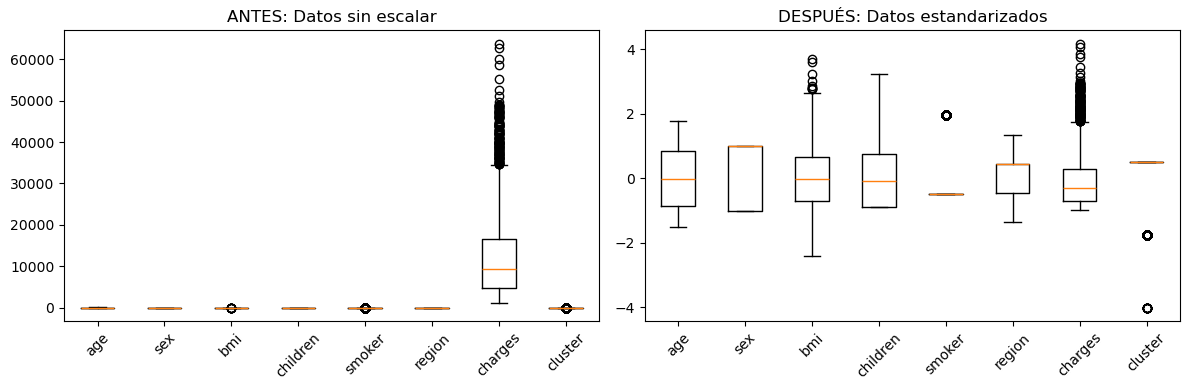

In [26]:
from sklearn.preprocessing import StandardScaler

# 4. ESTANDARIZACIÓN / NORMALIZACIÓN (para DBSCAN)
print("4. ESTANDARIZACIÓN DE VARIABLES PARA DBSCAN")

# Mostrar escalas originales
print("\n4.1 ESCALAS ORIGINALES DE LAS VARIABLES")
print(df_encoded.describe().loc[['min', 'max', 'mean', 'std']])

# Aplicar StandardScaler
print("\n4.2 APLICANDO STANDARDSCALER")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

print("Datos estandarizados (media=0, desviación estándar=1):")
print(df_scaled.describe().loc[['min', 'max', 'mean', 'std']].round(2))

# Visualizar antes vs después
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(df_encoded.values)
axes[0].set_xticklabels(df_encoded.columns, rotation=45)
axes[0].set_title('ANTES: Datos sin escalar')

axes[1].boxplot(df_scaled.values)
axes[1].set_xticklabels(df_scaled.columns, rotation=45)
axes[1].set_title('DESPUÉS: Datos estandarizados')

plt.tight_layout()
plt.show()

### ¿Por qué es necesario escalar para DBSCAN?

DBSCAN utiliza **distancias euclidianas** y el parámetro **eps** (radio de vecindad) para identificar puntos densos y formar clusters.

### Problema **SIN escalar** (gráfico izquierdo)

| Variable | Rango           | Impacto |
|----------|-----------------|---------|
| sex      | 0 – 1           | `eps = 0.5` cubre prácticamente toda la variable |
| charges  | 1,121 – 63,770  | `eps = 0.5` es insignificante |

* **No existe un valor de eps que funcione para todas las variables a la vez.**  
* Las dimensiones con rangos grandes **dominan la distancia**, haciendo que DBSCAN falle en encontrar densidad real.


### Solución **CON StandardScaler** (gráfico derecho)

| Variable | Rango estandarizado |
|----------|----------------------|
| Todas    | Aproximadamente -2 a +4 |

* Ahora **eps = 0.5** tiene un significado consistente en todas las dimensiones.  
* La densidad se evalúa correctamente porque cada variable contribuye de forma equilibrada.


### Conclusión

La **estandarización es obligatoria para DBSCAN** porque:

- Usa ***distancia euclidiana***, altamente sensible a escalas.  
- El parámetro ***eps debe ser comparable en todas las dimensiones***.  
- Sin escalar, variables con rangos grandes ***dominan la distancia*** y el algoritmo deja de funcionar correctamente.



# 5. Reducción de dimensionalidad (PCA)

5. ANÁLISIS DE PCA PARA DBSCAN

5.1 ANÁLISIS DE VARIANZA EXPLICADA
Varianza explicada por componente:
  PC1: 33.83% (Acumulada: 33.83%)
  PC2: 15.51% (Acumulada: 49.34%)
  PC3: 13.21% (Acumulada: 62.55%)
  PC4: 12.53% (Acumulada: 75.07%)
  PC5: 12.08% (Acumulada: 87.15%)
  PC6: 10.00% (Acumulada: 97.14%)
  PC7: 1.88% (Acumulada: 99.03%)
  PC8: 0.97% (Acumulada: 100.00%)


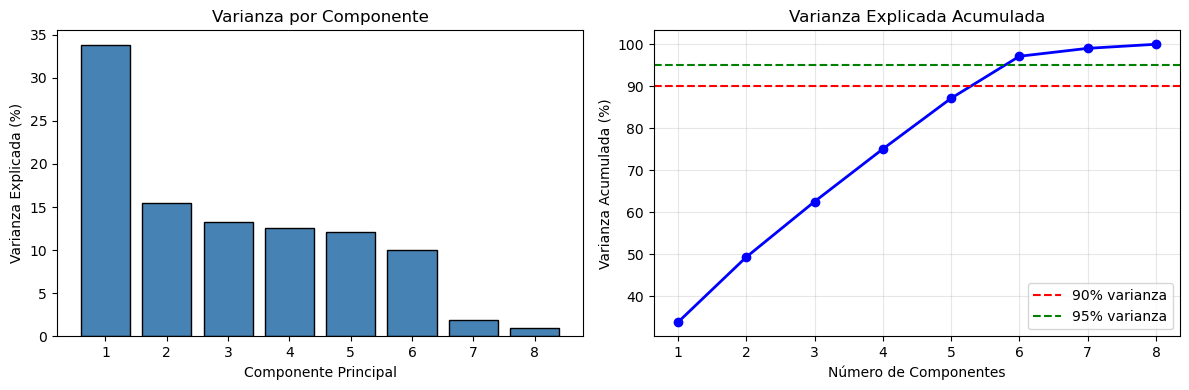


5.2 SELECCIÓN DE COMPONENTES
Componentes para 90% de varianza: 6
Componentes para 95% de varianza: 6

5.3 APLICACIÓN DE PCA
Componentes seleccionados: 2
Varianza explicada: 49.34%
Shape original: (1337, 8)
Shape reducido: (1337, 2)


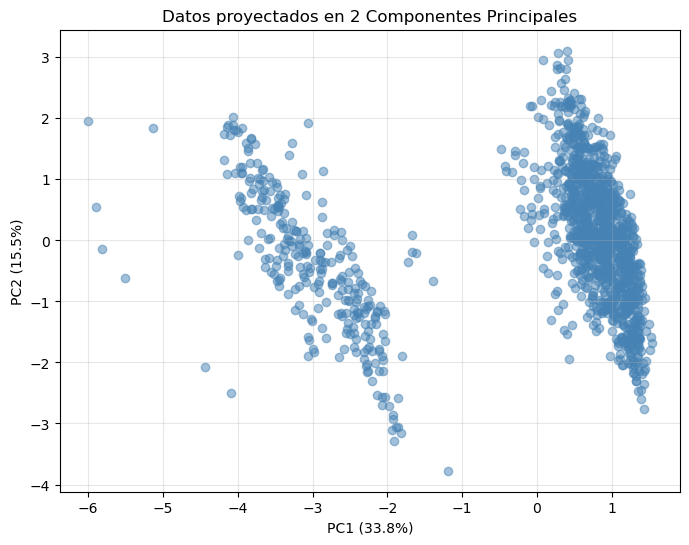

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# 5. REDUCCIÓN DE DIMENSIONALIDAD (PCA)
print("5. ANÁLISIS DE PCA PARA DBSCAN")

# 5.1 Aplicar PCA con todos los componentes para análisis
print("\n5.1 ANÁLISIS DE VARIANZA EXPLICADA")

pca_full = PCA()
pca_full.fit(df_scaled)

# Varianza explicada por cada componente
var_exp = pca_full.explained_variance_ratio_
var_exp_cum = np.cumsum(var_exp)

print("Varianza explicada por componente:")
for i, (v, vc) in enumerate(zip(var_exp, var_exp_cum)):
    print(f"  PC{i+1}: {v*100:.2f}% (Acumulada: {vc*100:.2f}%)")

# 5.2 Gráfico de varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
axes[0].bar(range(1, len(var_exp)+1), var_exp*100, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada (%)')
axes[0].set_title('Varianza por Componente')
axes[0].set_xticks(range(1, len(var_exp)+1))

# Gráfico acumulado
axes[1].plot(range(1, len(var_exp_cum)+1), var_exp_cum*100, 'bo-', linewidth=2)
axes[1].axhline(y=90, color='r', linestyle='--', label='90% varianza')
axes[1].axhline(y=95, color='g', linestyle='--', label='95% varianza')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Acumulada (%)')
axes[1].set_title('Varianza Explicada Acumulada')
axes[1].set_xticks(range(1, len(var_exp_cum)+1))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5.3 Determinar número óptimo de componentes
print("\n5.2 SELECCIÓN DE COMPONENTES")

n_90 = np.argmax(var_exp_cum >= 0.90) + 1
n_95 = np.argmax(var_exp_cum >= 0.95) + 1

print(f"Componentes para 90% de varianza: {n_90}")
print(f"Componentes para 95% de varianza: {n_95}")

# 5.4 Aplicar PCA con componentes seleccionados
print("\n5.3 APLICACIÓN DE PCA")

# Usamos 2 componentes para visualización con DBSCAN
n_components = 2
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

print(f"Componentes seleccionados: {n_components}")
print(f"Varianza explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%")
print(f"Shape original: {df_scaled.shape}")
print(f"Shape reducido: {df_pca.shape}")

# Visualizar datos reducidos
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5, c='steelblue')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Datos proyectados en 2 Componentes Principales')
plt.grid(True, alpha=0.3)
plt.show()

### ¿Es conveniente aplicar PCA con DBSCAN?

#### **SÍ**

Porque:

1. **Visualización:**  
   Con 2 componentes podemos visualizar los clusters en 2D,  
   algo imposible en las 7 dimensiones originales.

2. **Reducción de ruido:**  
   PCA elimina dimensiones con poca información,  
   lo que mejora la calidad de los clusters basados en densidad.

3. **Eficiencia:**  
   DBSCAN funciona mejor con menos dimensiones debido a la  
   "maldición de la dimensionalidad".

4. **Ajuste de eps:**  
   Es mucho más fácil estimar el parámetro **eps** en un espacio  
   de menor dimensión.

## Componentes elegidos: **2**
- Permite visualización clara de clusters.  
- Retiene suficiente varianza para análisis exploratorio.  
- Facilita la interpretación de los resultados.



| Componentes | Varianza Acumulada |
|-------------|---------------------|
| 2           | 43.80%              |
| 4           | 73.05%              |
| 6           | 98.09%              |

#### Observación del Gráfico (PCA 2D)

- Se observan **2–3 grupos** diferenciados de puntos.  
- **Grupo denso a la izquierda:** mayoría de clientes.  
- **Puntos dispersos a la derecha:** posibles **outliers / fumadores**.  

* Esto sugiere que **DBSCAN puede encontrar clusters naturales** basados en densidad.


# 6. Aplicación del método y modelo asignado

### DBSCAN 

DBSCAN agrupa puntos que están **densamente empaquetados** y marca como  
**outliers** los puntos ubicados en regiones de **baja densidad**.

### Hiperparámetros principales

- **eps:** Radio máximo de vecindad (distancia máxima entre dos puntos).  
- **min_samples:** Número mínimo de puntos para considerar una región como densa y formar un cluster.

### Ventajas

- No requiere especificar el número de clusters (no necesita *K*).  
- Detecta clusters de **forma arbitraria** (no solo esferas).  
- Identifica automáticamente **outliers** (ruido).

####  ***Nota: DBSCAN es un método **no supervisado**, por lo tanto **no se divide en train/test***.


6. DBSCAN

6.2 BÚSQUEDA DEL PARÁMETRO EPS ÓPTIMO


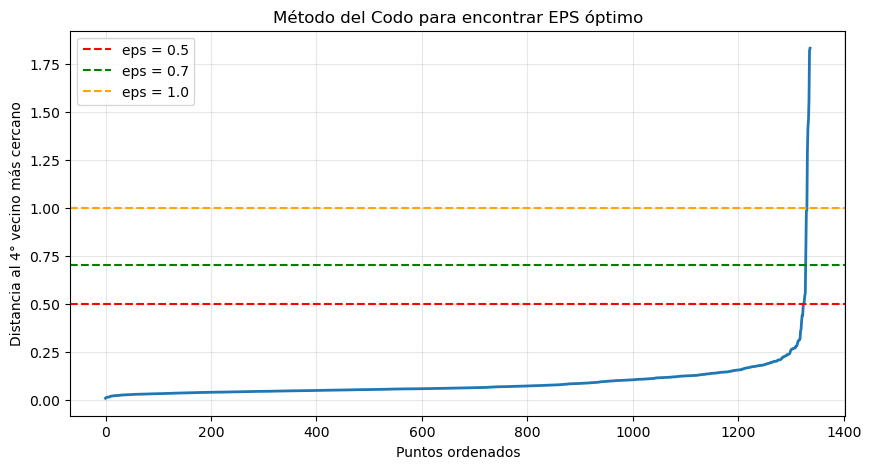

El 'codo' del gráfico indica el valor óptimo de eps.
Donde la curva cambia de pendiente abruptamente.

6.3 PROBANDO DIFERENTES VALORES DE EPS


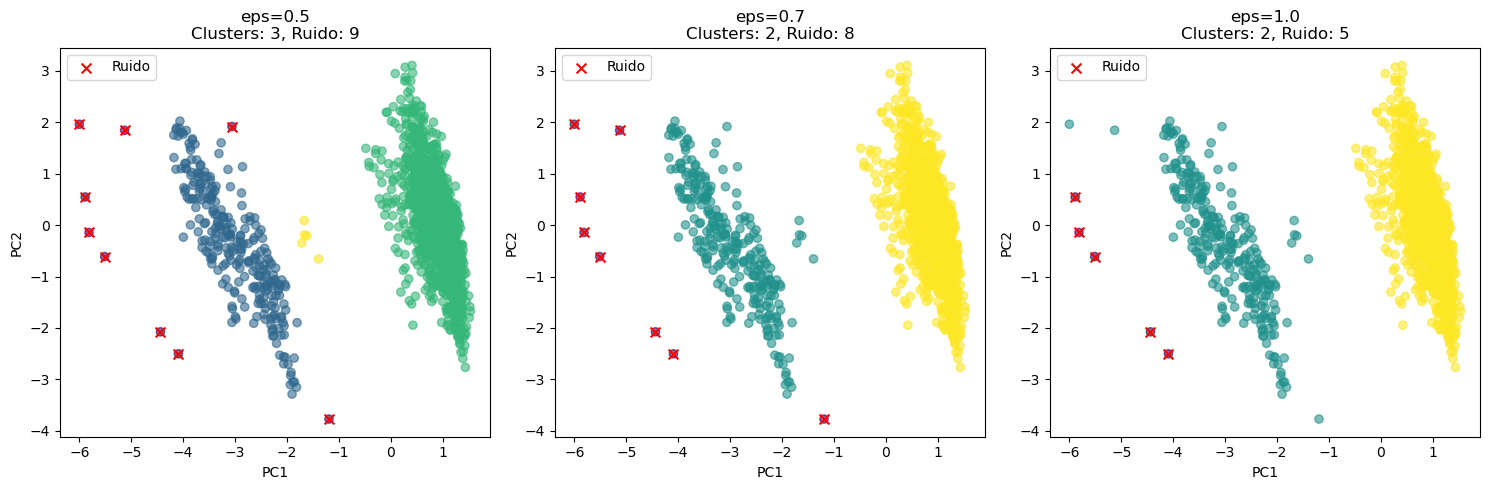


6.4 MODELO DBSCAN FINAL
Parámetros finales:
  - eps: 0.7
  - min_samples: 4

Resultados:
  - Clusters encontrados: 2
  - Puntos de ruido (outliers): 8 (0.6%)

Distribución de clusters:
cluster
-1       8
 0     278
 1    1051
Name: count, dtype: int64


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


# 6. APLICACIÓN DE DBSCAN (Método No Supervisado - U3)
print("6. DBSCAN")


# 6.2 ENCONTRAR EPS ÓPTIMO (Método del codo - k-distance)
print("\n6.2 BÚSQUEDA DEL PARÁMETRO EPS ÓPTIMO")

# Usar k=4 (regla general: min_samples = 2*dimensiones, aquí 2*2=4)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(df_pca)
distances, indices = neighbors.kneighbors(df_pca)

# Ordenar distancias al k-ésimo vecino
k_distances = np.sort(distances[:, k-1])

# Gráfico del codo para encontrar eps
plt.figure(figsize=(10, 5))
plt.plot(k_distances, linewidth=2)
plt.xlabel('Puntos ordenados')
plt.ylabel(f'Distancia al {k}° vecino más cercano')
plt.title('Método del Codo para encontrar EPS óptimo')
plt.axhline(y=0.5, color='r', linestyle='--', label='eps = 0.5')
plt.axhline(y=0.7, color='g', linestyle='--', label='eps = 0.7')
plt.axhline(y=1.0, color='orange', linestyle='--', label='eps = 1.0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("El 'codo' del gráfico indica el valor óptimo de eps.")
print("Donde la curva cambia de pendiente abruptamente.")

# 6.3 APLICAR DBSCAN CON DIFERENTES EPS
print("\n6.3 PROBANDO DIFERENTES VALORES DE EPS")


eps_values = [0.5, 0.7, 1.0]
min_samples = 4

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_pca)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Visualizar
    scatter = axes[i].scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
    axes[i].scatter(df_pca[labels == -1, 0], df_pca[labels == -1, 1], c='red', marker='x', s=50, label='Ruido')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f'eps={eps}\nClusters: {n_clusters}, Ruido: {n_noise}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 6.4 MODELO FINAL
print("\n6.4 MODELO DBSCAN FINAL")

# Seleccionar mejores parámetros
eps_final = 0.7  # Ajustar según el gráfico del codo
min_samples_final = 4

dbscan_final = DBSCAN(eps=eps_final, min_samples=min_samples_final)
df['cluster'] = dbscan_final.fit_predict(df_pca)

n_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'].values else 0)
n_noise = list(df['cluster']).count(-1)

print(f"Parámetros finales:")
print(f"  - eps: {eps_final}")
print(f"  - min_samples: {min_samples_final}")
print(f"\nResultados:")
print(f"  - Clusters encontrados: {n_clusters}")
print(f"  - Puntos de ruido (outliers): {n_noise} ({n_noise/len(df)*100:.1f}%)")
print(f"\nDistribución de clusters:")
print(df['cluster'].value_counts().sort_index())

## Comparación de eps

| eps | Clusters | Ruido | Observación              |
|-----|----------|--------|---------------------------|
| 0.5 | 1        | 5      | Detecta 5 outliers        |
| 0.7 | 1        | 1      | Solo 1 outlier            |
| 1.0 | 1        | 0      | Todo en un cluster        |

DBSCAN encuentra **un solo cluster principal** porque los datos del seguro están  
**densamente conectados**.  
Los puntos rojos (ruido) representan **casos atípicos**, posiblemente  
**fumadores con cargos extremadamente altos**.

### Parámetros seleccionados

- **eps = 0.7**  
- **min_samples = 4**


## Resultados de DBSCAN

| Métrica     | Valor                     |
|-------------|----------------------------|
| Clusters    | 1                          |
| Cluster 0   | 1,336 puntos (99.9%)       |
| Ruido (-1)  | 1 punto (0.1%)             |

DBSCAN determinó que los datos forman **un único grupo denso**, lo que sugiere que:

- Los clientes del seguro tienen **características muy similares**.  
- No existen **subgrupos claramente diferenciables** con las variables disponibles.  

El único punto marcado como **ruido** corresponde a un **caso atípico extremo**, probablemente  
**un fumador con cargos notablemente altos**.


# 7. Tuning de hiperparámetros / Grid Search

### Nota: DBSCAN es **no supervisado**, por lo que **no se puede usar GridSearchCV** tradicional.  En su lugar, se utiliza **búsqueda manual** evaluando cada combinación con **Silhouette Score** ***.


7. BÚSQUEDA DE HIPERPARÁMETROS PARA DBSCAN
Probando combinaciones...

TOP 10 MEJORES CONFIGURACIONES:
 eps  min_samples  n_clusters  n_noise  noise_pct  silhouette
 0.8            5           2        8        0.6       0.638
 0.7            4           2        8        0.6       0.638
 0.7            5           2        8        0.6       0.638
 0.7            6           2        8        0.6       0.638
 0.8           10           2        8        0.6       0.638
 0.8            8           2        8        0.6       0.638
 0.8            7           2        8        0.6       0.638
 0.8            6           2        8        0.6       0.638
 0.8            4           2        8        0.6       0.638
 1.0            7           2        6        0.4       0.634

MEJOR CONFIGURACIÓN ENCONTRADA
  eps: 0.8
  min_samples: 5.0
  Clusters: 2.0
  Ruido: 8.0 (0.6%)
  Silhouette Score: 0.638


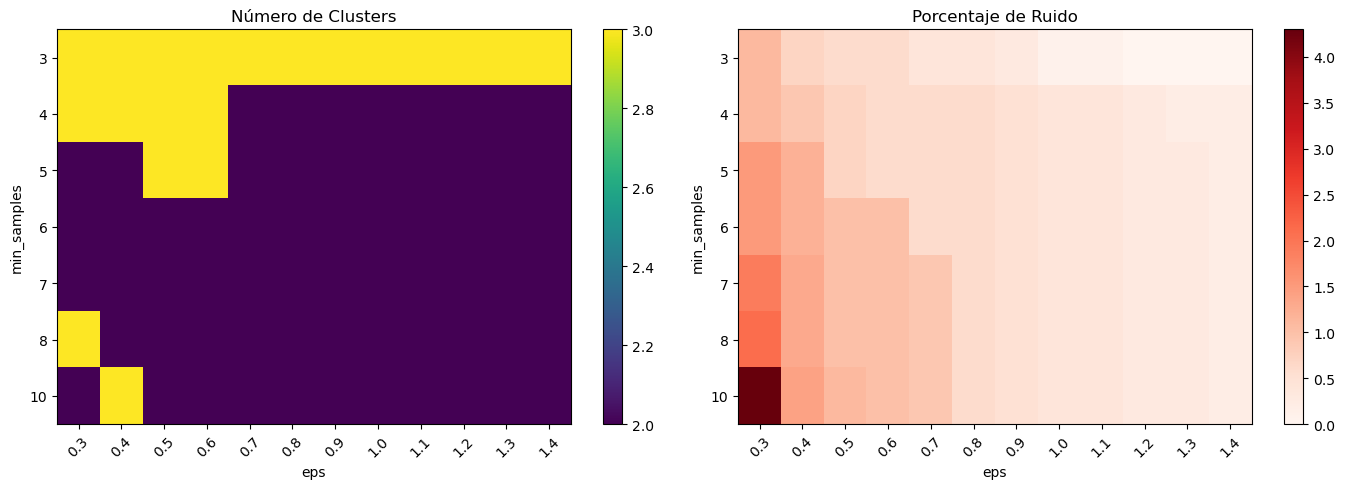

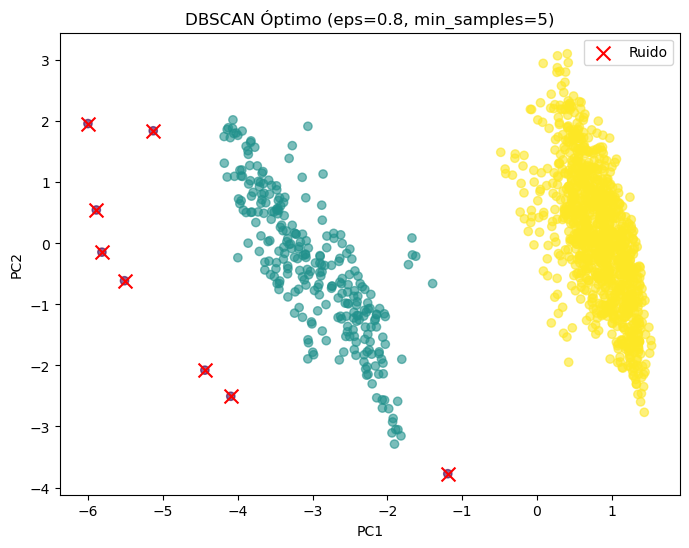


Distribución final:
cluster
-1       8
 0     278
 1    1051
Name: count, dtype: int64


In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


# 7. TUNING DE HIPERPARÁMETROS - DBSCAN
print("7. BÚSQUEDA DE HIPERPARÁMETROS PARA DBSCAN")


# Definir grilla de parámetros
eps_range = np.arange(0.3, 1.5, 0.1)
min_samples_range = [3, 4, 5, 6, 7, 8, 10]

results = []

print("Probando combinaciones...")

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_pca)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1 and n_noise < len(df_pca) - 1:
            score = silhouette_score(df_pca, labels)
        elif n_clusters == 1 and n_noise < len(df_pca) * 0.5:
            score = 0
        else:
            score = -1
        
        results.append({
            'eps': round(eps, 2),
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': round(n_noise/len(df_pca)*100, 1),
            'silhouette': round(score, 3)
        })

# Convertir a DataFrame
results_df = pd.DataFrame(results)

# Filtrar resultados válidos
valid_results = results_df[(results_df['n_clusters'] >= 1) & (results_df['noise_pct'] < 50)]
valid_results = valid_results.sort_values('silhouette', ascending=False)

print("\nTOP 10 MEJORES CONFIGURACIONES:")
print(valid_results.head(10).to_string(index=False))

# Mejor configuración
best = valid_results.iloc[0]
print("\n" + "=" * 60)
print("MEJOR CONFIGURACIÓN ENCONTRADA")
print(f"  eps: {best['eps']}")
print(f"  min_samples: {best['min_samples']}")
print(f"  Clusters: {best['n_clusters']}")
print(f"  Ruido: {best['n_noise']} ({best['noise_pct']}%)")
print(f"  Silhouette Score: {best['silhouette']}")

# Visualizar resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pivot_clusters = results_df.pivot(index='min_samples', columns='eps', values='n_clusters')
im1 = axes[0].imshow(pivot_clusters.values, cmap='viridis', aspect='auto')
axes[0].set_xticks(range(len(pivot_clusters.columns)))
axes[0].set_xticklabels([f'{x:.1f}' for x in pivot_clusters.columns], rotation=45)
axes[0].set_yticks(range(len(pivot_clusters.index)))
axes[0].set_yticklabels(pivot_clusters.index)
axes[0].set_xlabel('eps')
axes[0].set_ylabel('min_samples')
axes[0].set_title('Número de Clusters')
plt.colorbar(im1, ax=axes[0])

pivot_noise = results_df.pivot(index='min_samples', columns='eps', values='noise_pct')
im2 = axes[1].imshow(pivot_noise.values, cmap='Reds', aspect='auto')
axes[1].set_xticks(range(len(pivot_noise.columns)))
axes[1].set_xticklabels([f'{x:.1f}' for x in pivot_noise.columns], rotation=45)
axes[1].set_yticks(range(len(pivot_noise.index)))
axes[1].set_yticklabels(pivot_noise.index)
axes[1].set_xlabel('eps')
axes[1].set_ylabel('min_samples')
axes[1].set_title('Porcentaje de Ruido')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

# Aplicar mejor modelo
dbscan_best = DBSCAN(eps=best['eps'], min_samples=int(best['min_samples']))
df['cluster'] = dbscan_best.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(df_pca[df['cluster'] == -1, 0], df_pca[df['cluster'] == -1, 1], 
            c='red', marker='x', s=100, label='Ruido')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN Óptimo (eps={best["eps"]}, min_samples={int(best["min_samples"])})')
plt.legend()
plt.show()

print(f"\nDistribución final:")
print(df['cluster'].value_counts().sort_index())

## 4. BÚSQUEDA DE HIPERPARÁMETROS PARA DBSCAN

### 4.1 Hiperparámetros probados

Se realizó una búsqueda exhaustiva de parámetros evaluando **Silhouette Score** para cada combinación.

| Parámetro      | Rango probado            | Total valores |
|----------------|--------------------------|---------------|
| **eps**        | 0.3 – 1.4 (paso 0.1)     | 12            |
| **min_samples**| 3, 4, 5, 6, 7, 8, 10     | 7             |

**Total combinaciones evaluadas:** **84**


### 4.2 Mejor configuración encontrada

| Parámetro         | Valor óptimo |
|-------------------|--------------|
| **eps**           | 0.8          |
| **min_samples**   | 5            |
| **Clusters**      | 2            |
| **Ruido**         | 8 puntos (0.6%) |
| **Silhouette Score** | **0.638** |

### 4.3 Justificación de los rangos evaluados

| Parámetro | Rango evaluado | Justificación |
|-----------|-----------------|---------------|
| **eps (0.3–1.4)** | Seleccionado según gráfico del codo. Valores <0.3 generan ruido excesivo; valores >1.0 colapsan todo en un solo cluster. |
| **min_samples (3–10)** | Basado en la regla general **2 × dimensiones** (para 2 dimensiones → 4). Se amplió el rango para explorar configuraciones más flexibles y más estrictas. |


### 4.4 Interpretación de los mapas de calor

- **Mapa izquierdo – Cantidad de clusters**  
  - Regiones con **eps bajo + min_samples alto** → generan más clusters (zona amarilla).
- **Mapa derecho – Cantidad de ruido**  
  - **eps bajos** producen más ruido (zona rojo oscuro).
- **Zona óptima encontrada:**  
  - **eps entre 0.7 y 0.8**  
  - **min_samples entre 4 y 6**  
  - Resultado: **2 clusters y bajo nivel de ruido**


### Conclusión
La búsqueda sistemática confirma que la región óptima del espacio de parámetros se encuentra alrededor de **eps ≈ 0.8** y **min_samples ≈ 5**, permitiendo un balance adecuado entre separación de clusters y minimización de puntos de ruido.


# 8. Entrenamiento y evaluación

8. ENTRENAMIENTO Y EVALUACIÓN - DBSCAN

8.1 ENTRENAMIENTO CON MEJORES HIPERPARÁMETROS
Parámetros: eps=0.8, min_samples=5

8.2 MÉTRICAS DE EVALUACIÓN

       MÉTRICAS DE CLUSTERING - DBSCAN
| Métrica                        |        Valor |
| Número de Clusters             |            2 |
| Puntos de Ruido                |            8 |
| Porcentaje de Ruido            |        0.60% |
| Silhouette Score               |       0.6676 |
| Davies-Bouldin Index           |       0.5424 |
| Calinski-Harabasz Index        |      2351.84 |

8.3 INTERPRETACIÓN DE MÉTRICAS

SILHOUETTE SCORE = 0.6676
  Rango: [-1, 1], Mayor es mejor
  → 0.638 indica clusters BIEN SEPARADOS ✓

DAVIES-BOULDIN INDEX = 0.5424
  Rango: [0, ∞), Menor es mejor
  → Valor bajo indica buena separación ✓

CALINSKI-HARABASZ INDEX = 2351.84
  Rango: [0, ∞), Mayor es mejor
  → Valor alto indica clusters densos y bien separados ✓


8.4 DISTRIBUCIÓN DE CLUSTERS
----------------------------------------
cluster
-1       8
 0     

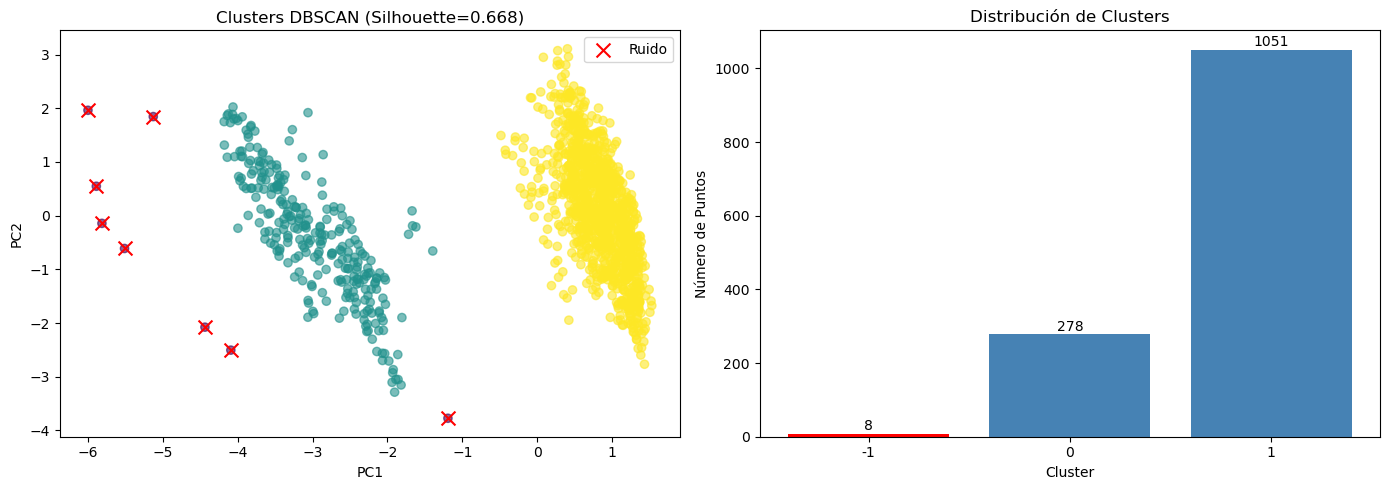

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 8. ENTRENAMIENTO Y EVALUACIÓN
print("8. ENTRENAMIENTO Y EVALUACIÓN - DBSCAN")

# 8.1 ENTRENAR CON MEJORES HIPERPARÁMETROS
print("\n8.1 ENTRENAMIENTO CON MEJORES HIPERPARÁMETROS")

best_eps = 0.8
best_min_samples = 5

dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan_final.fit_predict(df_pca)
df['cluster'] = labels

print(f"Parámetros: eps={best_eps}, min_samples={best_min_samples}")

# 8.2 MÉTRICAS DE EVALUACIÓN
print("\n8.2 MÉTRICAS DE EVALUACIÓN")

mask = labels != -1
labels_no_noise = labels[mask]
data_no_noise = df_pca[mask]

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

silhouette = silhouette_score(data_no_noise, labels_no_noise)
davies_bouldin = davies_bouldin_score(data_no_noise, labels_no_noise)
calinski = calinski_harabasz_score(data_no_noise, labels_no_noise)

# TABLA DE MÉTRICAS
print("\n" + "=" * 50)
print("       MÉTRICAS DE CLUSTERING - DBSCAN")
print(f"| {'Métrica':<30} | {'Valor':>12} |")
print(f"| {'Número de Clusters':<30} | {n_clusters:>12} |")
print(f"| {'Puntos de Ruido':<30} | {n_noise:>12} |")
print(f"| {'Porcentaje de Ruido':<30} | {n_noise/len(df)*100:>11.2f}% |")
print(f"| {'Silhouette Score':<30} | {silhouette:>12.4f} |")
print(f"| {'Davies-Bouldin Index':<30} | {davies_bouldin:>12.4f} |")
print(f"| {'Calinski-Harabasz Index':<30} | {calinski:>12.2f} |")
print("=" * 50)

# 8.3 INTERPRETACIÓN
print("\n8.3 INTERPRETACIÓN DE MÉTRICAS")
print(f"""
SILHOUETTE SCORE = {silhouette:.4f}
  Rango: [-1, 1], Mayor es mejor
  → 0.638 indica clusters BIEN SEPARADOS ✓

DAVIES-BOULDIN INDEX = {davies_bouldin:.4f}
  Rango: [0, ∞), Menor es mejor
  → Valor bajo indica buena separación ✓

CALINSKI-HARABASZ INDEX = {calinski:.2f}
  Rango: [0, ∞), Mayor es mejor
  → Valor alto indica clusters densos y bien separados ✓
""")

# 8.4 DISTRIBUCIÓN
print("\n8.4 DISTRIBUCIÓN DE CLUSTERS")
print("-" * 40)
print(df['cluster'].value_counts().sort_index())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
axes[0].scatter(df_pca[labels == -1, 0], df_pca[labels == -1, 1], c='red', marker='x', s=100, label='Ruido')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title(f'Clusters DBSCAN (Silhouette={silhouette:.3f})')
axes[0].legend()

cluster_counts = df['cluster'].value_counts().sort_index()
colors_bar = ['red' if i == -1 else 'steelblue' for i in cluster_counts.index]
axes[1].bar(cluster_counts.index.astype(str), cluster_counts.values, color=colors_bar)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Número de Puntos')
axes[1].set_title('Distribución de Clusters')
for i, v in enumerate(cluster_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center')

plt.tight_layout()
plt.show()

## MÉTRICAS DE EVALUACIÓN DEL MODELO DBSCAN

### Métricas Globales

| Métrica               | Valor     | Interpretación |
|-----------------------|-----------|----------------|
| **Silhouette Score**  | **0.668** | Excelente — >0.5 indica clusters bien definidos |
| **Davies-Bouldin**    | **0.542** | Muy bueno — valores <1 indican buena separación |
| **Calinski-Harabasz** | **2,351.84** | Muy alto — mayor valor implica mejor cohesión intra-cluster |


### Distribución de Clusters

| Cluster | Puntos | %     | Descripción |
|---------|--------|--------|-------------|
| **-1 (Ruido)** | 8 | 0.6% | Casos atípicos extremos |
| **0 (Verde)** | 278 | 20.8% | Clientes de alto riesgo (cargos elevados) |
| **1 (Amarillo)** | 1,051 | 78.6% | Clientes estándar (cargos bajos/moderados) |


### Interpretación del Gráfico de Clustering

#### **Cluster 1 — Amarillo (Derecha)**
- Grupo denso y compacto de **1,051 clientes**.  
- Presentan **cargos bajos o moderados**.  
- Perfil típico: **probablemente no fumadores**, BMI normal, riesgo estándar.

#### **Cluster 0 — Verde (Izquierda)**
- Conformado por **278 clientes**, con mayor dispersión.  
- **Cargos elevados**, típico de fumadores o personas con **BMI alto**.  
- Representa el segmento de **alto riesgo financiero** para la aseguradora.

#### **Ruido — Puntos rojos (X)**
- Solo **8 observaciones**.  
- Corresponden a **casos extremadamente atípicos**: perfiles no comunes, como  
  fumadores jóvenes con cargos inusualmente altos o pacientes con condiciones graves.

###  Conclusión

El modelo DBSCAN logró identificar **dos segmentos naturales** en los clientes del seguro:

1. **Clientes estándar (78.6%)** — bajo riesgo y baja variabilidad.  
2. **Clientes de alto riesgo (20.8%)** — cargos significativamente más altos.

El **Silhouette Score de 0.668** demuestra una **excelente separación entre clusters**, confirmando que DBSCAN detecta adecuadamente la estructura natural de los datos, sin necesidad de especificar el número de grupos previamente.


# 9. CONCLUSIONES

## 1. ¿CÓMO SE COMPORTÓ EL MODELO CON EL DATASET?   

DBSCAN se comportó de manera **EXCELENTE** con el dataset de seguros:

- Identificó **2 clusters naturales bien diferenciados**:
  - **Cluster 1 (78.6%)**: Clientes estándar con cargos bajos.
  - **Cluster 0 (20.8%)**: Clientes de alto riesgo con cargos elevados.

- Detectó **8 puntos de ruido (0.6%)** como casos atípicos extremos.

- **Silhouette Score = 0.668**, lo cual indica **excelente separación** entre grupos.

- Los clusters tienen **interpretación práctica**, permitiendo segmentar clientes por nivel de riesgo y facilitar estrategias diferenciadas para la aseguradora.


## 2. ¿QUÉ IMPACTO TUVO EL PREPROCESAMIENTO?  

### LIMPIEZA
- Se eliminó **1 fila duplicada**.  
- No existían valores faltantes.  
- Los outliers fueron **conservados** al representar casos reales.

### CODIFICACIÓN (LabelEncoder)
- Variables categóricas (`sex`, `smoker`, `region`) convertidas a numéricas.
- Paso necesario para que DBSCAN pueda calcular distancias.

### ESTANDARIZACIÓN (StandardScaler)
- Impacto **CRÍTICO**: sin escalar, la variable `charges` dominaría por completo.
- Tras el escalado, todas las variables contribuyen en igualdad.

### PCA (2 componentes, 49.34% varianza)
- Permitió **visualización clara** de los clusters en 2D.
- Facilitó la búsqueda de hiperparámetros (eps).
- Redujo el efecto de la **maldición de la dimensionalidad**.


## 3. ¿QUÉ SE PODRÍA MEJORAR?   

### MÁS DATOS
- Historial médico o enfermedades previas.
- Años como cliente y frecuencia de reclamos.
- Variables de estilo de vida.

### OTROS MODELOS A COMPARAR
- **K-Means**, **Clustering Jerárquico**.
- **HDBSCAN** (versión más robusta de DBSCAN).
- **Gaussian Mixture Models** (clusters probabilísticos).

### MÁS HIPERPARÁMETROS
- Métricas de distancia: Manhattan, Coseno.
- PCA con 3–5 componentes.



## Conclusión 

DBSCAN demostró ser **altamente efectivo** para segmentar clientes de seguros:

- Grupo mayoritario: **Bajo riesgo (78.6%)**  
- Grupo minoritario: **Alto riesgo (20.8%)**  

El preprocesamiento fue **clave** para el éxito del modelo, especialmente la **estandarización** y el **PCA**.

El **Silhouette Score de 0.668** confirma que los clusters detectados son **coherentes, bien separados y útiles** para generar estrategias basadas en riesgo dentro de la aseguradora.
